# Fleet modeling

This notebook aims at using the classes dedicated to the fleet modelling that are used in aeromaps.

In [1]:
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.base import (
    AircraftParameters,
    SubcategoryParameters,
    CategoryParameters,
    Aircraft,
    SubCategory,
    Category,
    Fleet,
    FleetGrowthModel,
)

from aeromaps.models.parameters import YearParameters

year_parameters = YearParameters(
    historic_start_year=2020, prospection_start_year=2020, end_year=2050
)

from aeromaps.models.air_transport.constants import EnergyTypes

import pandas as pd

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

Lets create the following categories and subcategories of aircraft:
- Short range:
    - Narrow-body
    - Regional Turboprop
    - Regional Turbofan
- Medium range (Narrow-body)
- Long range (Wide-body)

Lets now assemble these categories into a fleet object.

In [2]:
fleet = Fleet()

In [3]:
fleet.ui

In [4]:
print(list(list(fleet.categories.values())[0].subcategories[0].aircraft.values())[0].name)
list(list(fleet.categories.values())[0].subcategories[0].aircraft.values())[0].parameters
# list(fleet.categories.values())[0].subcategories[0].datagrid.data

New Narrow-body 1


AircraftParameters(entry_into_service_year=2035, consumption_gain=15.0, nox_gain=30.0, soot_gain=30.0)

In [5]:
fleet_model = FleetGrowthModel(fleet=fleet, year_parameters=year_parameters)
fleet_model.compute()
fleet_model.df

,Short range:Short range narrow-body:Recent Reference:single_aircraft_share [%],Short range:Short range narrow-body:Old Reference:single_aircraft_share [%],Short range:Short range narrow-body:New Narrow-body 1:single_aircraft_share [%],Short range:Short range narrow-body:New Narrow-body 2:single_aircraft_share [%],Medium range:Medium-range:Recent Reference:single_aircraft_share [%],Medium range:Medium-range:Old Reference:single_aircraft_share [%],Medium range:Medium-range:New Medium-range 1:single_aircraft_share [%],Medium range:Medium-range:New Medium-range 2:single_aircraft_share [%],Long range:Long-range:Recent Reference:single_aircraft_share [%],Long range:Long-range:Old Reference:single_aircraft_share [%],Long range:Long-range:New Long-range 1:single_aircraft_share [%],Long range:Long-range:New Long-range 2:single_aircraft_share [%],Short range:Short range narrow-body:Recent Reference:aircraft_share [%],Short range:Short range narrow-body:Old Reference:aircraft_share [%],Short range:Short range narrow-body:New Narrow-body 2:aircraft_share [%],Short range:Short range narrow-body:New Narrow-body 1:aircraft_share [%],Short range:Short range narrow-body:energy_consumption [MJ/ASK],Short range:energy_consumption [MJ/ASK],Medium range:Medium-range:Recent Reference:aircraft_share [%],Medium range:Medium-range:Old Reference:aircraft_share [%],Medium range:Medium-range:New Medium-range 2:aircraft_share [%],Medium range:Medium-range:New Medium-range 1:aircraft_share [%],Medium range:Medium-range:energy_consumption [MJ/ASK],Medium range:energy_consumption [MJ/ASK],Long range:Long-range:Recent Reference:aircraft_share [%],Long range:Long-range:Old Reference:aircraft_share [%],Long range:Long-range:New Long-range 2:aircraft_share [%],Long range:Long-range:New Long-range 1:aircraft_share [%],Long range:Long-range:energy_consumption [MJ/ASK],Long range:energy_consumption [MJ/ASK],global_fleet:energy_consumption [MJ/ASK]
2020,52.876766,47.123234,0.000000,0.000000,29.166009,70.833991,0.000000,0.000000,35.913905,64.086095,0.000000,0.000000,52.876766,47.123234,0.000000,0.000000,1.088927,1.088927,29.166009,70.833991,0.000000,0.000000,0.852613,0.852613,35.913905,64.086095,0.000000,0.000000,0.994180,0.994180,0.970261
2021,60.504799,39.495201,0.000000,0.000000,35.985595,64.014405,0.000000,0.000000,43.345777,56.654223,0.000000,0.000000,60.504799,39.495201,0.000000,0.000000,1.066086,1.066086,35.985595,64.014405,0.000000,0.000000,0.837720,0.837720,43.345777,56.654223,0.000000,0.000000,0.974772,0.974772,0.951504
2022,67.653409,32.346591,0.000000,0.000000,43.422251,56.577749,0.000000,0.000000,51.089537,48.910463,0.000000,0.000000,67.653409,32.346591,0.000000,0.000000,1.044681,1.044681,43.422251,56.577749,0.000000,0.000000,0.821479,0.821479,51.089537,48.910463,0.000000,0.000000,0.954548,0.954548,0.932357
2023,74.062792,25.937208,0.000000,0.000000,51.167334,48.832666,0.000000,0.000000,58.781355,41.218645,0.000000,0.000000,74.062792,25.937208,0.000000,0.000000,1.025489,1.025489,51.167334,48.832666,0.000000,0.000000,0.804566,0.804566,58.781355,41.218645,0.000000,0.000000,0.934460,0.934460,0.913627
2024,79.585401,20.414599,0.000000,0.000000,58.856770,41.143230,0.000000,0.000000,66.066961,33.933039,0.000000,0.000000,79.585401,20.414599,0.000000,0.000000,1.008953,1.008953,58.856770,41.143230,0.000000,0.000000,0.787773,0.787773,66.066961,33.933039,0.000000,0.000000,0.915433,0.915433,0.896062
2025,84.183244,15.816756,0.000000,0.000000,66.136725,33.863275,0.000000,0.000000,72.663676,27.336324,0.000000,0.000000,84.183244,15.816756,0.000000,0.000000,0.995186,0.995186,66.136725,33.863275,0.000000,0.000000,0.771875,0.771875,72.663676,27.336324,0.000000,0.000000,0.898205,0.898205,0.880242
2026,87.902949,12.097051,0.000000,0.000000,72.725477,27.274523,0.000000,0.000000,78.397295,21.602705,0.000000,0.000000,87.902949,12.097051,0.000000,0.000000,0.984048,0.984048,72.725477,27.274523,0.000000,0.000000,0.757486,0.757486,78.397295,21.602705,0.000000,0.000000,0.883232,0.

In [6]:
# Gains summary
df = fleet_model.df[["global_fleet:energy_consumption [MJ/ASK]"]]
df = fleet_model.df[["Medium range:Medium-range:energy_consumption [MJ/ASK]"]]
gains_2035 = (1 - df.loc[2035] / df.loc[2020]) * 100
gains_2050 = (1 - df.loc[2050] / df.loc[2020]) * 100
annual_gains = 100 * (1 - (1 + (df.loc[2050] / df.loc[2020] - 1)) ** (1 / (2050 - 2020)))


print("Gains in 2035 w.r.t 2020: ", float(gains_2035), " [%]")
print("Gains in 2050 w.r.t 2020: ", float(gains_2050), " [%]")
print("Mean annual gains between 2020 and 2050: ", float(annual_gains), " [%]")
print(fleet_model.df[["Medium range:Medium-range:energy_consumption [MJ/ASK]"]])

Gains in 2035 w.r.t 2020:  17.818587389686225  [%]
Gains in 2050 w.r.t 2020:  27.63600081984109  [%]
Mean annual gains between 2020 and 2050:  1.0724124101937904  [%]
      Medium range:Medium-range:energy_consumption [MJ/ASK]
2020                                           0.852613    
2021                                           0.837720    
2022                                           0.821479    
2023                                           0.804566    
2024                                           0.787773    
2025                                           0.771875    
2026                                           0.757486    
2027                                           0.744985    
2028                                           0.734503    
2029                                           0.725974    
2030                                           0.719200    
2031                                           0.713925    
2032                                           0.7098

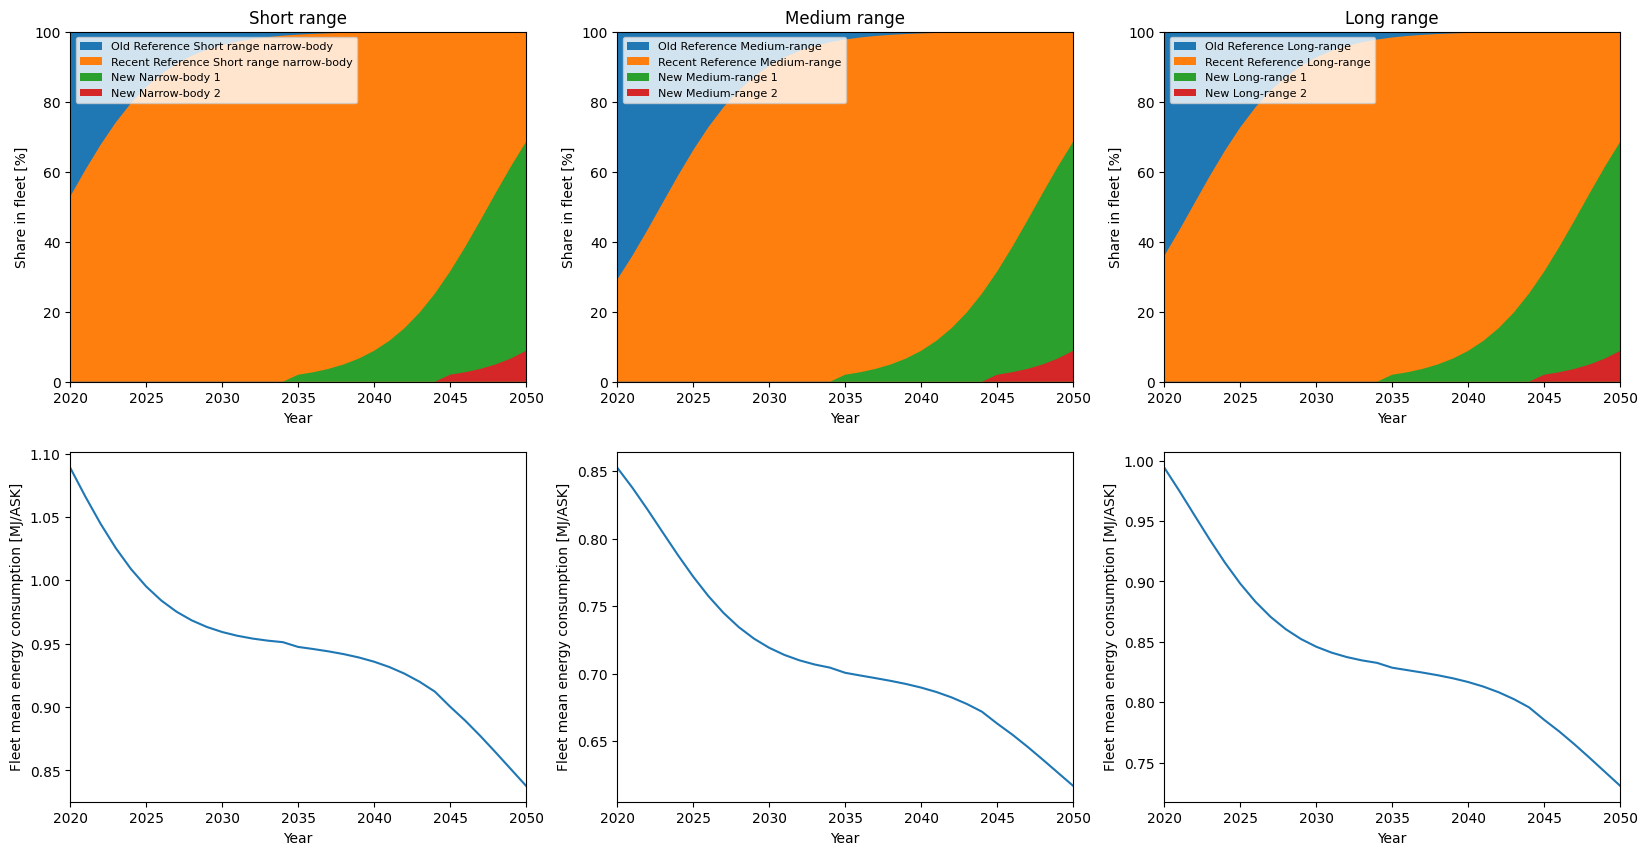

In [7]:
fleet_model.plot()